For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

pip install vega_datasets

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from vega_datasets import data

import warnings
warnings.filterwarnings("ignore")


In [385]:
df = data.sf_temps()

from vega_datsets import data


data.sf_temps()

Use the above dataset for the exercises below:

- Resample by the day and take the average temperature. Visualize the average temperature over time.
- Write the code necessary to visualize the minimum temperature over time.
- Write the code necessary to visualize the maximum temperature over time.
- Which month is the coldest, on average?
- Which month has the highest average temperature?
- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [4]:
df.shape

(8759, 2)

In [386]:
df = df.set_index("date")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
temp    8759 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


##### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [18]:
df.resample("D").mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
2010-01-06,49.529167
2010-01-07,49.466667
2010-01-08,49.475000
2010-01-09,49.537500


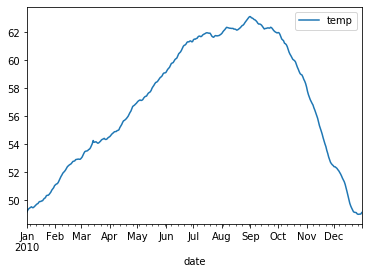

In [22]:
df.resample("D").mean().plot()
plt.show()

##### Write the code necessary to visualize the minimum temperature over time.

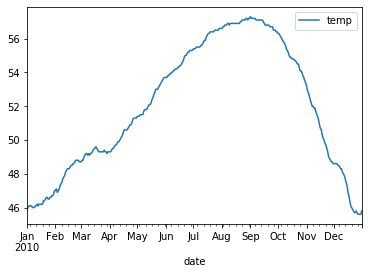

In [37]:
df.resample("D").min().plot()
plt.show()

##### Write the code necessary to visualize the maximum temperature over time.


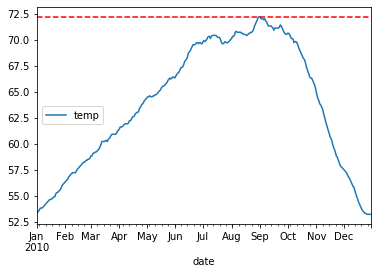

In [193]:
ax = df.resample("D").max().plot()
max_temp = df.resample("D").max().temp.max()
ax.axhline(max_temp, color="r", ls="--")
plt.show()

##### Which month is the coldest, on average?


In [403]:
# df
df.resample("M").mean().temp.sort_values().head(1)
# df.resample("M").mean() == df.resample("M").mean().min()
# df.resample("M").mean() [df.resample("M").mean() == df.resample("M").mean().min()[0]]


date
2010-01-31    49.98414
Name: temp, dtype: float64

##### Which month has the highest average temperature?

In [404]:
df.resample("M").mean().temp.sort_values().tail(1)
# df.resample("M").mean().temp.sort_values().idxmax()

date
2010-09-30    62.487083
Name: temp, dtype: float64

##### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [197]:
df_temp = df.resample("D").agg(["min","max"])
df_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [198]:
df_temp["change"] = df_temp["temp"]["max"] - df_temp["temp"]["min"]
df_temp.head()

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7

In [405]:
df_temp.resample("M").sum() [df_temp.resample("M").sum() == df_temp.resample("M").sum().change.max()].change

date
2010-01-31      NaN
2010-02-28      NaN
2010-03-31      NaN
2010-04-30      NaN
2010-05-31      NaN
2010-06-30      NaN
2010-07-31    433.3
2010-08-31      NaN
2010-09-30      NaN
2010-10-31      NaN
2010-11-30      NaN
2010-12-31      NaN
Freq: M, Name: change, dtype: float64

##### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

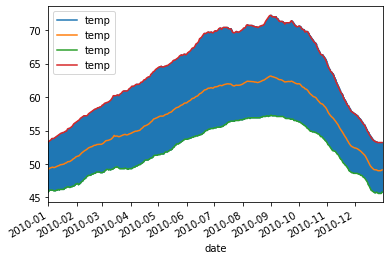

In [194]:
ax = df.plot()
df.resample('D').mean().plot(ax=ax)
df.resample('D').min().plot(ax=ax)
df.resample('D').max().plot(ax=ax)
plt.show()

from vega_datasets import data

data.seattle_weather()

Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [407]:
df = data.seattle_weather()

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
date             1461 non-null datetime64[ns]
precipitation    1461 non-null float64
temp_max         1461 non-null float64
temp_min         1461 non-null float64
wind             1461 non-null float64
weather          1461 non-null object
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [409]:
df = df.set_index("date")

##### Which year and month combination has the highest amount of precipitation?

In [413]:
df.resample("M").sum().precipitation.sort_values().tail(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

##### Visualize the amount of monthly precipitation over time.

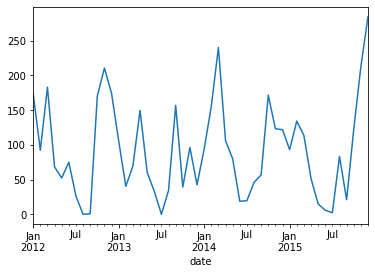

In [257]:
df.resample("M").sum().precipitation.plot()
plt.show()

##### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

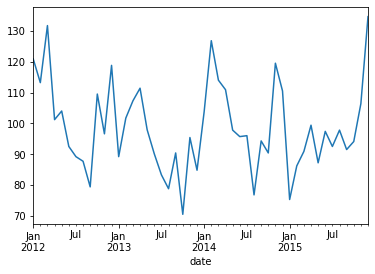

In [416]:
df.resample("M").sum().wind.plot()
plt.show()

##### Which year-month combination is the windiest?

In [415]:
df.resample("M").sum().wind.sort_values().tail(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

##### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [289]:
df [df.weather == "sun"].resample("Y").count().weather.sort_values().tail(1).index.year

Int64Index([2014], dtype='int64', name='date')

##### In which month does it rain the most?

In [365]:
df.precipitation.groupby(df.index.month).sum().sort_values().tail(1)

date
11    642.5
Name: precipitation, dtype: float64

##### Which month has the most number of days with a non-zero amount of precipitation?

In [374]:
df [df.precipitation != 0].groupby(df [df.precipitation != 0].index.month).precipitation.count().sort_values().tail(1)

date
12    81
Name: precipitation, dtype: int64

data.flights_20k()

- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [418]:
df = data.flights_20k()

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
date           20000 non-null datetime64[ns]
delay          20000 non-null int64
destination    20000 non-null object
distance       20000 non-null int64
origin         20000 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.3+ KB


In [467]:
df

,delay,destination,distance,origin
date,,,,
2001-01-13 14:56:00,32,SJC,417,SAN
2001-01-31 16:40:00,0,ISP,1093,FLL
2001-02-11 18:39:00,3,DAL,293,LBB
2001-01-10 21:00:00,0,MCO,550,MSY
2001-03-30 21:45:00,0,IND,229,STL
2001-03-14 14:55:00,3,MDW,405,MCI
2001-03-14 19:04:00,20,PHX,1999,BWI
2001-01-22 09:05:00,0,SAN,628,ABQ
2001-01-30 19:15:00,22,BUR,358,SMF


In [420]:
df = df.set_index("date")

##### Convert any negative delays to 0.

In [432]:
df.delay [df.delay < 0] = 0 

In [434]:
df.head()

,delay,destination,distance,origin
date,,,,
2001-01-13 14:56:00,32,SJC,417,SAN
2001-01-31 16:40:00,0,ISP,1093,FLL
2001-02-11 18:39:00,3,DAL,293,LBB
2001-01-10 21:00:00,0,MCO,550,MSY
2001-03-30 21:45:00,0,IND,229,STL


##### Which hour of the day has the highest average delay?

In [458]:
df.delay.groupby(df.index.hour).mean().sort_values().tail(1)

date
3    302.5
Name: delay, dtype: float64

##### Does the day of the week make a difference in the delay amount?

In [473]:
df.delay.groupby(df.index.weekday).mean()

date
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

##### Does the month make a difference in the delay amount?

In [468]:
df.delay.resample("M").mean()

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64

data.iowa_electricity()

- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total

In [494]:
df = data.iowa_electricity()

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
year              51 non-null datetime64[ns]
source            51 non-null object
net_generation    51 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [496]:
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [497]:
df = df.set_index("year")

##### For each row, calculate the percentage of the year's total that energy source provided.

In [498]:
# df["percent"] = df.net_generation  
df.resample("Y").sum()

,net_generation
year,
2001-12-31,40651
2002-12-31,42528
2003-12-31,42107
2004-12-31,43236
2005-12-31,44145
2006-12-31,45473
2007-12-31,49778
2008-12-31,53086
2009-12-31,51859


##### Lineplot of generation over time, color by source

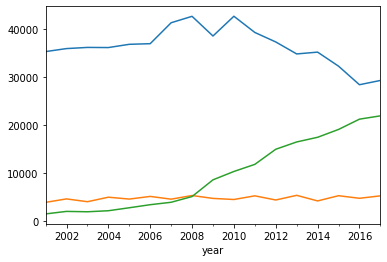

In [511]:
df[df.source == "Fossil Fuels"].net_generation.plot()
df[df.source == "Nuclear Energy"].net_generation.plot()
df[df.source == "Renewables"].net_generation.plot()
plt.show()

##### Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [518]:
df.pivot_table(index="source",columns=df.index.year)

net_generation                                            \
year                     2001   2002   2003   2004   2005   2006   2007   
source                                                                    
Fossil Fuels            35361  35991  36234  36205  36883  37014  41389   
Nuclear Energy           3853   4574   3988   4929   4538   5095   4519   
Renewables               1437   1963   1885   2102   2724   3364   3870   

                                                                               \
year             2008   2009   2010   2011   2012   2013   2014   2015   2016   
source                                                                          
Fossil Fuels    42734  38620  42750  39361  37379  34873  35250  32319  28437   
Nuclear Energy   5282   4679   4451   5215   4347   5321   4152   5243   4703   
Renewables       5070   8560  10308  11795  14949  16476  17452  19091  21241   

                       
year             2017  
source                 
Fossil Fuels    29329  
Nuclear Energy   5214  
Renewables      21933

##### Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

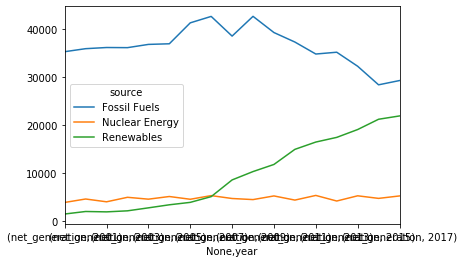

In [521]:
df.pivot_table(index="source",columns=df.index.year).T.plot()
plt.show()

##### Is the total generation increasing over time?

##### How would you control for increasing consumption over time when considering how much energy is coming from each source? express each number as a % of the year's total